In [6]:
import os
import matplotlib.pyplot as plt
from cellpose import models, io , plot

In [7]:
image_paths = [
    "imagee/1.JPG",
    "imagee/2.JPG",
    ]


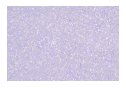

In [8]:
# Load and view one image
img = io.imread(image_paths[1])
plt.figure(figsize=(2, 2))
plt.imshow(img)
plt.axis('off')
plt.show()

In [9]:
# Run Cellpose on each image
model = models.Cellpose(gpu=False, model_type='cyto')

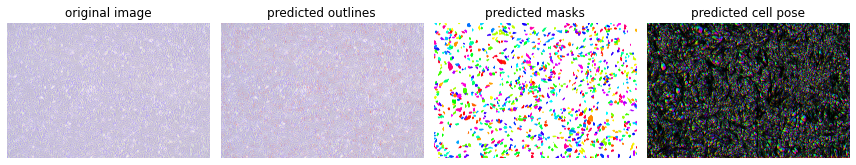

In [10]:
for image_path in image_paths:
    img = io.imread(image_path)
    # Replace [2, 3] with the appropriate channels for your images
    channels = [2, 3]
    masks, flows, styles, diams = model.eval(img, diameter=None, channels=channels)

    # Save segmentation results
    io.masks_flows_to_seg(img, masks, flows, diams, image_path, channels)

    # Save results as PNG
    io.save_to_png(img, masks, flows, image_path)

# Display segmentation results for the last image
fig = plt.figure(figsize=(12, 5))
plot.show_segmentation(fig, img, masks, flows[0], channels=channels)
plt.tight_layout()
plt.show()